<a href="https://colab.research.google.com/github/dikoharyadhanto/Geemap_for_Python/blob/main/008_Zonal_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.9 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none

In [2]:
!pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pycrs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32686 sha256=b847cb4934a0514a6020a6f9df07093f77994befcd59b66476b9389fa2cba0db
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built pycrs


In [4]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 90.4 MB/s eta 0:00:00


In [27]:
import geemap
import ee
import os
import zipfile
import geopandas as gpd
import pandas as pd

In [6]:
Map = geemap.Map()
Map

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=FGv2hPgwLp6qzkxrb-wN7dK4aCvlpmzO_ZDSIgyEWY8&tc=KDn8dLaiKg5jqJHnsYjJ6nY2Y2bT9VaqTJy-gwT9nhM&cc=6eh5NkiUHjjnB7U5s4ObMN81l-Nw-lvFcCFmUesG2Vg

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VNE1fdEZn7qpYWE8hYkJ2MUutjygbUCUCuWWEVIx9sBHaTStjK4luE

Successfully saved authorization token.


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

# Define Image

In [7]:
# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')

# Set visualization parameters.
dem_vis = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

# Add Earth Engine DEM to map
Map.addLayer(dem, dem_vis, 'SRTM DEM')

In [8]:
# Add Landsat data to map
landsat = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')

landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(landsat, landsat_vis, "LE7_TOA_5YEAR/1999_2003")

#Define ROI

In [9]:
! git clone https://github.com/dikoharyadhanto/Geemap_for_Python/

Cloning into 'Geemap_for_Python'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 89 (delta 45), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (89/89), 2.53 MiB | 1.57 MiB/s, done.


In [11]:
#Extract Dataset ZIP
zip_ref = zipfile.ZipFile("/content/Geemap_for_Python/data/Jakarta_Kota.zip", 'r')
zip_ref.extractall("/content/Geemap_for_Python/data/DKI_Jakarta_Kec")
zip_ref.close()

<Axes: >

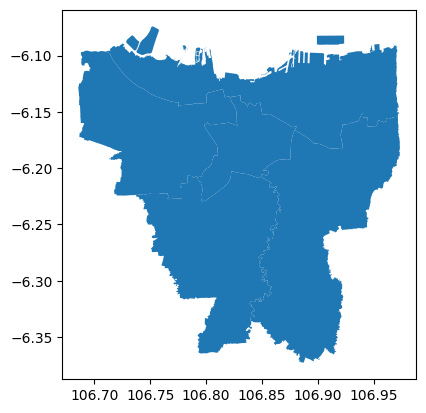

In [17]:
jakarta_shp = '/content/Geemap_for_Python/data/DKI_Jakarta_Kec/Jakarta_Kota/Jakarta_Kota.shp'

jakarta_gdf = gpd.read_file(jakarta_shp)
jakarta_gdf.plot()

In [19]:
jakarta_roi = geemap.shp_to_ee(jakarta_shp)
Map.addLayer(jakarta_roi, {}, 'Jakarta')

#Calculate Zonal Statistics

## DEM Zonal Statistics Data

In [20]:
out_dir = "/content/Geemap_for_Python/data"
out_dem_stats = os.path.join(out_dir, 'dem_stats.csv')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [21]:
# Allowed output formats: csv, shp, json, kml, kmz
# Allowed statistics type: MEAN, MAXIMUM, MINIMUM, MEDIAN, STD, MIN_MAX, VARIANCE, SUM
geemap.zonal_statistics(dem, jakarta_roi, out_dem_stats, statistics_type='MEAN', scale=1000)

Computing statistics ...


Generating URL ...
Please wait ...
Data downloaded to /content/Geemap_for_Python/data/dem_stats.csv


In [28]:
dem_stats = pd.read_csv(out_dem_stats)
dem_stats

,mean,system:index,WADMKC,KDBBPS,WADMKD,KDEPUM,KDCPUM,FCODE,WIADKK,NAMOBJ,...,KDEBPS,KDPKAB,SRS_ID,SHAPE_Area,KDPPUM,TIPADM,WIADPR,LUASWH,METADATA,WADMPR
0,9.127753,0,NaN,NaN,NaN,NaN,NaN,BA03080040,NaN,JAKARTA PUSAT,...,NaN,3171,NaN,0.003984,NaN,0,NaN,0,NaN,NaN
1,3.556300,1,NaN,NaN,NaN,NaN,NaN,BA03080040,NaN,JAKARTA UTARA,...,NaN,3172,NaN,0.011990,NaN,0,NaN,0,NaN,NaN
2,7.816229,2,NaN,NaN,NaN,NaN,NaN,BA03080040,NaN,JAKARTA BARAT,...,NaN,3173,NaN,0.010240,NaN,0,NaN,0,NaN,NaN
3,32.348040,3,NaN,NaN,NaN,NaN,NaN,BA03080040,NaN,JAKARTA SELATAN,...,NaN,3174,NaN,0.011827,NaN,0,NaN,0,NaN,NaN
4,26.411820,4,NaN,NaN,NaN,NaN,NaN,BA03080040,NaN,JAKARTA TIMUR,...,NaN,3175,NaN,0.015121,NaN,0,NaN,0,NaN,NaN


In [24]:
# create download link
geemap.create_download_link(out_dem_stats)

## Landsat Zonal Statistics Data

In [23]:
out_landsat_stats = os.path.join(out_dir, 'landsat_stats.csv')
geemap.zonal_statistics(
    landsat, jakarta_roi, out_landsat_stats, statistics_type='SUM', scale=1000
)

Computing statistics ...


Generating URL ...
Please wait ...
Data downloaded to /content/Geemap_for_Python/data/landsat_stats.csv


In [29]:
landsat_stats = pd.read_csv(out_landsat_stats)
landsat_stats

,B1,B2,B3,B4,B5,B6_VCID_2,B7,system:index,WADMKC,KDBBPS,...,KDEBPS,KDPKAB,SRS_ID,SHAPE_Area,KDPPUM,TIPADM,WIADPR,LUASWH,METADATA,WADMPR
0,1894.768627,1621.101961,1534.992157,2055.023529,2029.705882,9928.101961,1495.458824,0,NaN,NaN,...,NaN,3171,NaN,0.003984,NaN,0,NaN,0,NaN,NaN
1,5515.439216,4745.694118,4339.003922,5974.231373,5233.968627,29662.862745,3633.576471,1,NaN,NaN,...,NaN,3172,NaN,0.011990,NaN,0,NaN,0,NaN,NaN
2,4726.650980,4132.866667,3890.603922,5975.925490,5486.341176,25498.352941,3810.850980,2,NaN,NaN,...,NaN,3173,NaN,0.010240,NaN,0,NaN,0,NaN,NaN
3,5085.686275,4292.874510,3955.980392,6752.388235,5951.819608,29392.254902,4018.450980,3,NaN,NaN,...,NaN,3174,NaN,0.011827,NaN,0,NaN,0,NaN,NaN
4,6617.380392,5692.086275,5262.894118,8995.819608,7842.031373,37597.007843,5247.345098,4,NaN,NaN,...,NaN,3175,NaN,0.015121,NaN,0,NaN,0,NaN,NaN


In [25]:
geemap.create_download_link(out_landsat_stats)